# Predicting The Recurrence of Thyroid Cancer Using Machine Mearning

In this notebook we will use machine learning to classify a patient as either having a recurrence of thyroid cancer or not. This 
will be what is called binary classification. For this project the predicted classes will just be a "yes" or "no" for the 
recurrence of thyroid cancer in the patient.

# What is classification?
Binary classification means that there is only two classes for the target variable on which we will make predictions on. There is also multiclass classification. 
Multiclass classification is when there are more than two classes that we are trying to predict. 

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have thyroid cancer or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have thyroid cancer?

## 2. Data

The original data came from the [Differentiated Thyroid Cancer Recurrence](https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence) dataset from the UCI Machine Learning Repository.



Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/jainaru/thyroid-disease-data).

The dataset contains 16 attributes (features). **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have thyroid cancer.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart thyroid cancer during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

### Thyroid Cancer Data Dictionary

1. Age: The age of the patient, as an integer, at the time of diagnosis or treatment, in years.
2. Gender: The gender of the patient (male or female).
    * 0: F = Female
    * 1: M = Male
3. Smoking: Whether the patient is a smoker or not.
    * 0: Yes = Smoker
    * 1: No = Non-Smoker
4. Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
    * 0: Yes = History of smoking
    * 1: No = No history of smoking
5. Hx Radiotherapy: History of radiotherapy treatment for any condition.
    * 0: Yes = History of radiotherapy
    * 1: No = No history of radiotherapy
6. Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
7. Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
8. Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
9. Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
10. Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
11. Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
12. T: Tumor classification based on its size and extent of invasion into nearby structures.
13. N: Nodal classification indicating the involvement of lymph nodes.
14. M: Metastasis classification indicating the presence or absence of distant metastases.
15. Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
16. Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
17. Recurred: Indicates whether the cancer has recurred after initial treatment.

## Import Important Data Analysis and Machine Learning Libraries

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Models from scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Model evaluation imports.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [2]:
df = pd.read_csv("./data/thyroid_disease.csv")
df.shape

(383, 17)

## Exploratory Data Analysis 

There is a lot that can be explored during the Exploratory Data Analysis (EDA) part of a project. But we will only explore a couple of parts of 
the data here as exploring more would require domain expetise or access to someone with domain knowledge of the data and subject.

We can see below that there 383 instances of our data and 17 columns, one of which is the target variable we will be trying to predict. We can also see that there are no missing values in any of our columns. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


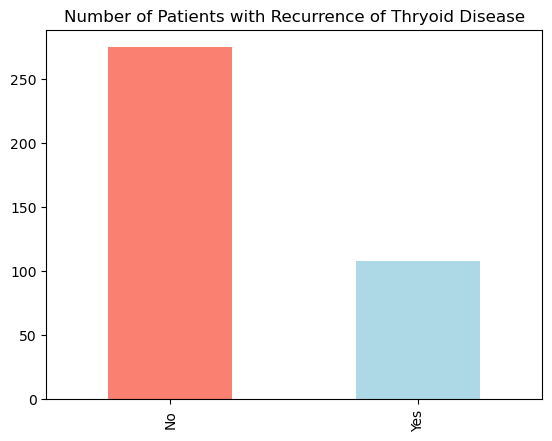

In [5]:
df["Recurred"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Number of Patients with Recurrence of Thryoid Disease");

We can see below that about 71.80% of the patients do not have thyroid cancer in our dataset. This means that the target variable is heavily skewed towards the calss "No". There is about 50% more instances of patients without thyroid cancer than those with it in the data set.

In [6]:
df["Recurred"].value_counts()

No     275
Yes    108
Name: Recurred, dtype: int64

In [7]:
recurred_total = df["Recurred"].value_counts()["Yes"]
nonrecurred_total = df["Recurred"].value_counts()["No"]

print(f"Percent of patients with recurrence of thyroid cancer is {(recurred_total / len(df)) * 100:.2f}%")
print(f"Percent of patients with non-recurrence of thyroid cancer is {(nonrecurred_total / len(df)) * 100:.2f}%")

Percent of patients with recurrence of thyroid cancer is 28.20%
Percent of patients with non-recurrence of thyroid cancer is 71.80%


Below we check to see if there are any missing values in our dataset.

In [8]:
df.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

Next we will analyze the "Age" feature of the data. We can see below that the mean age of the patients is about 41 years old. We can also see that about 50% of the patients are between the ages of 29 and 37. The youngest patient is 15 and the oldest patient is 82. 

We can also see from the histogram and the boxplot that the data is right skewed. 

In [9]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


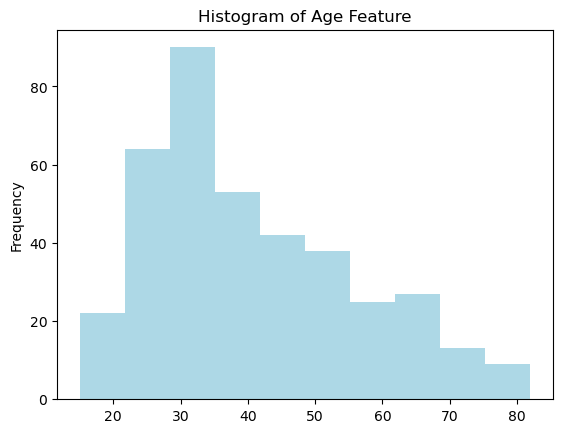

In [10]:
df["Age"].plot(kind="hist", color="lightblue")
plt.title("Histogram of Age Feature");

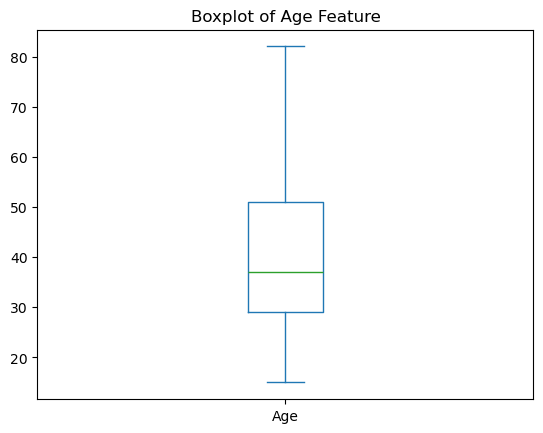

In [11]:
df["Age"].plot(kind="box")
plt.title("Boxplot of Age Feature");

## Thyroid cancer frequency with respect to gender

In [12]:
# The count of each class of gender
df["Gender"].value_counts()

F    312
M     71
Name: Gender, dtype: int64

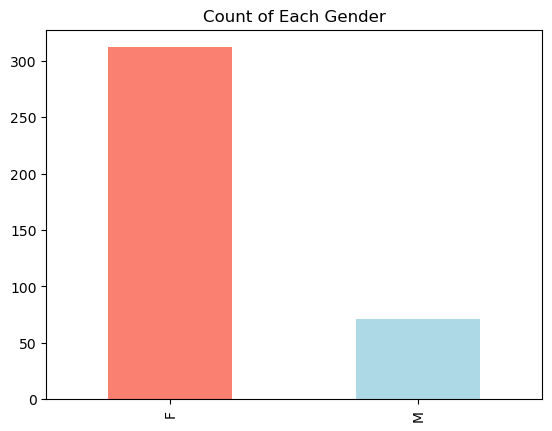

In [13]:
df["Gender"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Count of Each Gender");

In [14]:
# Percentage of each class of gender
print(f"The percent of Males in the dataset is {df["Gender"].value_counts(normalize=True)["M"] * 100:.2f}%")
print(f"The percent of Females in the dataset is {df["Gender"].value_counts(normalize=True)["F"] * 100:.2f}%")

The percent of Males in the dataset is 18.54%
The percent of Females in the dataset is 81.46%


In [15]:
df["Gender"].value_counts()["F"] / df["Gender"].value_counts()["M"]

4.394366197183099

In [16]:
pd.crosstab(df["Gender"], df["Recurred"])

Recurred,No,Yes
Gender,,
F,246,66
M,29,42


Let's visualize the data from the crosstabulation. 

As we can see below, there is a large difference between Males and Females for the patients that do not have thyroid cancer. This might be due the fact that there are about 3 times more Females in the dataset than Males. The numbers are a lot closer for the patients that do have thyroid cancer. But again, due to the skewed nature and small sample size, it is best to not generalize beyond this dataset to a larger population.

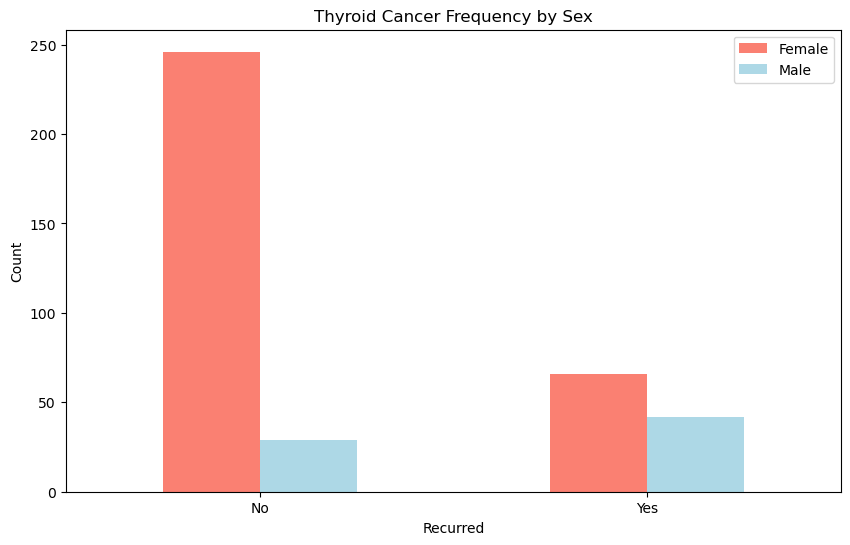

In [17]:
pd.crosstab(df["Recurred"], df["Gender"]).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Thyroid Cancer Frequency by Sex")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Thyroid Cancer Frequency by Currently Smoking or A History of Smoking

If we look at the crosstabultion we notice that there are more patients with thyroid cancer that are current smokers than those with a history of smoking. 
This might suggest that if one quits smoking that they might reduce their chances of being diagnosed with thyroid cancer. 

In [18]:
pd.crosstab(df["Hx Smoking"], df["Recurred"])

Recurred,No,Yes
Hx Smoking,,
No,261,94
Yes,14,14


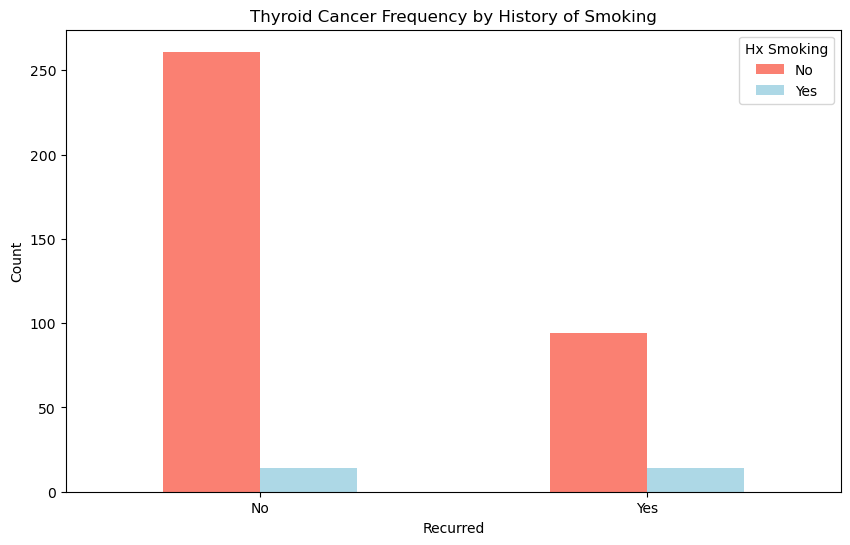

In [19]:
pd.crosstab(df["Recurred"], df["Hx Smoking"]).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Thyroid Cancer Frequency by History of Smoking")
plt.ylabel("Count")
plt.xticks(rotation=0);

In [20]:
pd.crosstab(df["Smoking"], df["Recurred"])

Recurred,No,Yes
Smoking,,
No,259,75
Yes,16,33


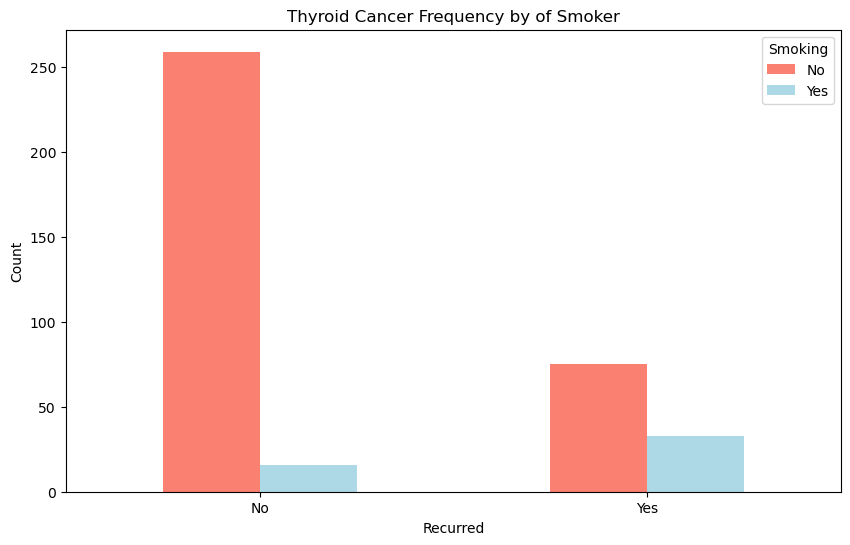

In [21]:
pd.crosstab(df["Recurred"], df["Smoking"]).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Thyroid Cancer Frequency by of Smoker")
plt.ylabel("Count")
plt.xticks(rotation=0);

There is a lot that can be investigated in this dataset but it would be best to do it along with an actual subject matter expert that can help give insights into the features being used. Next we will move onto modeling the dataset.

# Modeling

In [22]:
# Split data into features and target sets
X = df.drop(columns=["Recurred"])
y = df["Recurred"]

In [23]:
X.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [24]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

## Build Preprocessing Pipeline

We will build a preprocessing pipeline so that we can transform our features into a form that is easier for the machine learning algorithms to use. We will also split our data into train and test sets.

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

num_attribs = ["Age"]

cat_attribs = X.columns.to_list()[1:]

num_pipeline = Pipeline([
    ("standarize", StandardScaler())
])

cat_pipeline = Pipeline([
    ("one_hot", OneHotEncoder())
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [26]:
X_prepared = preprocessing.fit_transform(X)
y_encoded = LabelEncoder().fit_transform(y)

In [27]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, )

Now that we've got our data split into training and test sets, it's time to build our machine learnong models.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 5 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. SGDClassifier
5. SVC

First we will get a baseline of how well our models perform without any hyperparameter optimization. 

In [28]:
# Create dictionary of models
models = {"LogisticRegression": LogisticRegression(),
          "RandomForest": RandomForestClassifier(),
          "KNN" : KNeighborsClassifier(),
          "SGDClassifier": SGDClassifier()}

# Function to train models and score them.
def train_models(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    
    return scores

In [29]:
model_scores = train_models(models, X_train, X_test, y_train, y_test)
model_scores = pd.DataFrame(model_scores, index=[0])

## Model Comparison

We can see the accuracy scores of our models below. Notice that the SGDClassifier achieved the highest score so far. 

Accuracy here is the total number of correct predicitons made divided by the total number of predictions. The SGDClassifier achieved an accuracy of about 96%. 

In [30]:
model_scores

,LogisticRegression,RandomForest,KNN,SGDClassifier
0,0.948052,0.974026,0.922078,0.935065


Now that we've got our baseline model... and we know a model's first predictions aren't always what we should base our 
next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report 
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning (by hand)

Hyperparameter tuning is almost always done by using special helper functions and classes from a package like scikit-learn. 
The hyperparameter tuning that is being done below by hand is mainly for demonstration purposes in order to show 
plainly what is essentially happening under the hood. 

We we conduct hyperparameter tuning we are just searching the space of given values for the hypeparameters in order to 
the ones that give the best results for a model. 

In [31]:
# Let's tune KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Let's see visually what our hypeparameter tuning has found by looking at the graph below. We can clearly see that when 
the number of neighbors is set to 11, our model performs best on the test set.

Maximum KNN score on the test data is 93.51%


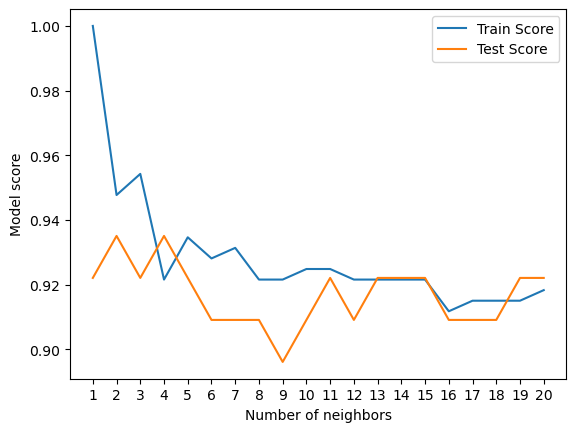

In [32]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21))
plt.legend()

print(f"Maximum KNN score on the test data is {max(test_scores)*100:.2f}%")

We can see that we've improved the test score for the KNN model from 83% to 93.15%.

## Hyperparameter Optimization with RandomizedSearchCV

When using RandomizedSearchCV, scikit-learn searches the hyperparameter space given in a random fashion. Meaning it chooses, at random, 
hyperparameter values to train the model on. 

We will try it on all 5 of our modles since the dataset is only about 300 instances. 

In [45]:
# Create a hyperparameter grid for LogisticRegression
# log_reg_grid = {"C":np.logspace(-4,4,10),
#                 "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
#                 "penalty": ["l1", "l2", "elasticnet"],
#                 "fit_intercept": [True, False]}

log_reg_grid = [{"C":np.logspace(-4,4,10),
                "solver":["lbfgs"],
                "penalty": ["l2", None],
                "fit_intercept": [True, False]},
                {"C":np.logspace(-4,4,10),
                "solver":["liblinear"],
                "penalty": ["l1", "l2"],
                "fit_intercept": [True, False]},
                {"C":np.logspace(-4,4,10),
                "solver":["newton-cg"],
                "penalty": ["l2", None],
                "fit_intercept": [True, False]},
                {"C":np.logspace(-4,4,10),
                "solver":["newton-cholesky"],
                "penalty": ["l2", None],
                "fit_intercept": [True, False]},
                {"C":np.logspace(-4,4,10),
                "solver":["sag"],
                "penalty": ["l2", None],
                "fit_intercept": [True, False]},
                {"C":np.logspace(-4,4,10),
                "solver":["saga"],
                "l1_ratio":np.random.uniform(low=0.0001, high=1, size=10),
                "penalty": ["l1", "l2", "elasticnet", None],
                "fit_intercept": [True, False]}
                ]

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [3, 5, 10, 15],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

# Create a hyperparameter grid for SVC
# svc_grid = {"C":np.logspace(0.001,2,10),
#             "kernel": ["linear", "poly", "rbf", "sigmoid"],
#             "gamma": ["scale", "auto"]}

# Create a hyperparameter grid for SGDClassifier
sgd_grid = {"loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", \
                     "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
            "penalty": ["l1", "l2", "elasticnet"],
            "alpha": np.logspace(0.0001, 0.01, 10)}

# Create a hyperparameter grid for KNN
knn_grid = {"n_neighbors": np.arange(20),
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}

Now that we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV.

In [49]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(n_jobs=-1, max_iter=300),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=50,
                                error_score="raise")
rs_log_reg.fit(X_train, y_train)

/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=LogisticRegression(max_iter=300, n_jobs=-1),
                   n_iter=50,
                   param_distributions=[{'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                         'fit_intercept': [True, False],
                                         'penalty': ['l2', None],
                                         'solver...
                                        {'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                         'fit_intercept': [True, False],
                                         'l1_ratio': array([0.98996124, 0.32242161, 0.80989346, 0.25471519, 0.68153457,
       0.76025184, 0.59567918, 0.47162903, 0.41189973, 0.34893338]),
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     None],
                                         'solver': ['saga']}])

In [52]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20)
rs_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [53]:
rs_knn = RandomizedSearchCV(KNeighborsClassifier(n_jobs=-1),
                            param_distributions=knn_grid,
                            cv=5,
                            n_iter=20)
rs_knn.fit(X_train, y_train)

/usr/lib/python3.12/site-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/lib/python3.12/site-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/lib/python3.12/site-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/lib/python3.12/site-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/lib/python3.12/site-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                                        'weights': ['uniform', 'distance']})

In [54]:
rs_sgd = RandomizedSearchCV(SGDClassifier(n_jobs=-1),
                            param_distributions=sgd_grid,
                            cv=5,
                            n_iter=100)
rs_sgd.fit(X_train, y_train)

/usr/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceW

RandomizedSearchCV(cv=5, estimator=SGDClassifier(n_jobs=-1), n_iter=100,
                   param_distributions={'alpha': array([1.00023029, 1.00276692, 1.00530999, 1.00785951, 1.0104155 ,
       1.01297797, 1.01554694, 1.01812242, 1.02070443, 1.02329299]),
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber',
                                                 'squared_hinge', 'perceptron',
                                                 'squared_error', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

As we can see below, our models have done fairly well on the measure of accuracy. But, our models need to be evaluated on more than 
just the validations sets from the training set so that we can have a more accurate measure of the performance of our model.

In [55]:
randomcv_scores = {"LogisticRegression":rs_log_reg.best_score_,
                   "KNN":rs_knn.best_score_,
                   "SGDClassifier":rs_sgd.best_score_,
                   "RandomForest":rs_rf.best_score_}
randomcv_scores = pd.DataFrame(randomcv_scores,
                              index=[0])
randomcv_scores

,LogisticRegression,KNN,SGDClassifier,RandomForest
0,0.947964,0.918509,0.931571,0.944685


## Evaluating our Tuned Machine Learning Classifier Beyond Accuracy


We will go ahead and continue the rest of this section with our currently best performing model which is the RandomForestClassifier.

Hre we will look at other performance metrics for our models other than accuracy. These will include:

* ROC curve and AUC
* Confusion matrix
* Classification report
* Precision 
* Recall
* F1-score

To make comparisons and evaluate our trained model, we need to make predictions first.

In [56]:
#  Make predictions with our trained model
y_preds = rs_rf.predict(X_test)

The ROC (Receiver Operating Characteristic) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR). 

The TPR is the ratio of positive instances that are correctly detected by the classifier.

$$TPR = \frac{\text{True Postives}}{\text{True Positives} + \text{False Negatives}}$$

The FPR is the ratio of negative instances that are incorrectly classified as positive.

$$FPR = \frac{\text{False Postives}}{\text{False Positives} + \text{True Negatives}}$$

Essentially, the closer this curve is to the top left corner, the more accurate our model is and the less mistakes it is making 
during its classification of instances.

The Area Under the Curve (AUC) is just a calculation of the area under the ROC curve that is ploted. This number helps quantify how 
good our model is as opposed to just looking at the plot, which can be hard to compare to other ROC plots. The higher 
the AUC number the better in general the model is. 

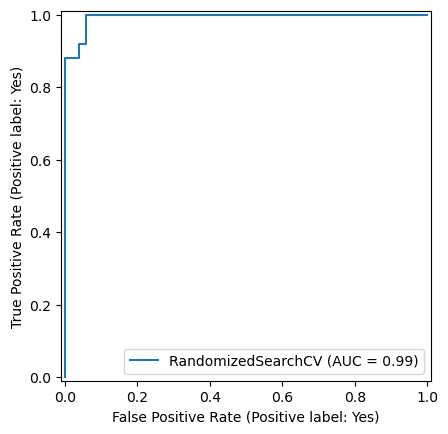

In [57]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test)

## Confusion Matrix

The confusionmatrix is simply a grid of values that tells you how many instances were classified in which manner. For example, 
the 52 in the top left corner of the matrix means that 52 instances we classified as 0 and 
the instance's true label was 0. 

We can easily see that our model here only made 4 missclassifications in total on the test set. This means that the true label was 1 but 
the classifier predicted that it was 0. This is of course just for our RandomForestClassifier model.

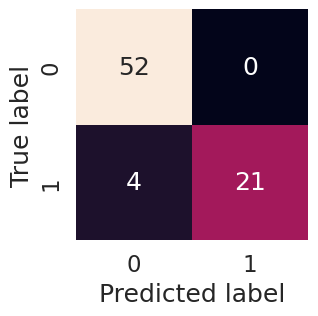

In [64]:
# Import Seaborn
import seaborn as sns
sns.set_theme(font_scale=1.5)
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now that we've got a ROC curve, an AUC metric, and a confusion matrix, let's get a classification report as well as cross-validated precision, recall, and 
f1-score. 

In [65]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          No       0.93      1.00      0.96        52
         Yes       1.00      0.84      0.91        25

    accuracy                           0.95        77
   macro avg       0.96      0.92      0.94        77
weighted avg       0.95      0.95      0.95        77



## Calculate evaluation metrics using cross-validation 

We will go ahead and continue the rest of this section with our currently best performing model which is the RandomForestClassifier. 
We're going to calculate precision, recall, and the f1-score of our model using cross-validation and to do so 
we'll be using `cross_val_score()`.

By calculating these metrics we get better understanding of how our model performs.

In [66]:
# Create a new classifier with the best hyperparameters
clf = RandomForestClassifier(**rs_rf.best_params_, n_jobs=-1)


In [67]:
score_types = ["accuracy", "precision", "recall", "f1"]

scores = {}

for type in score_types:
    scores[type] = np.mean(cross_val_score(clf, X_prepared, y_encoded, scoring=type))

scores

{'accuracy': 0.8822966507177034,
 'precision': 0.851444547996272,
 'recall': 0.8086580086580086,
 'f1': 0.8035749751737834}

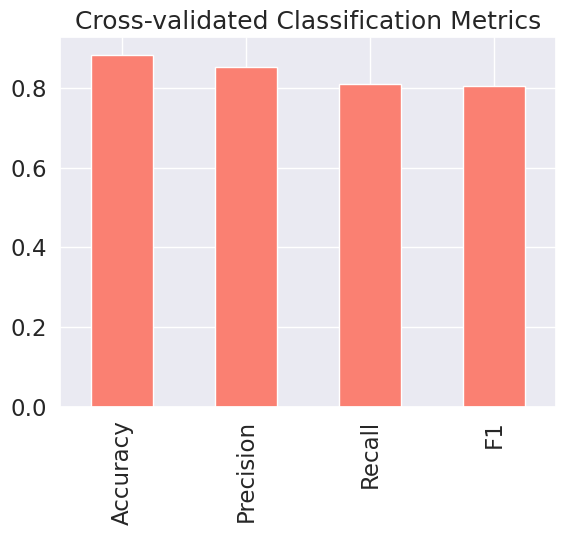

In [81]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(scores, index=[0])
cv_metrics.columns = cv_metrics.columns.str.capitalize()
cv_metrics

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics", legend=False, color="salmon");

# Ensemble Methods for Classification

## Voting Classifier

We will use two new approaches in our classification task. We will use a Voting Classifier and then a Stacking Classifier.

A voting classifier first takes in a list of estimators and then trains them on the training set. When the training of all the classifiers is done 
you can then use the voting classifier to make predictions on new data. It works by either using hard voting or soft voting. 

- Hard voting (a.k.a majority voting), means that the classifier wil predict the class that has been predicted the most by all the classifiers.
- Soft voting works by predicting the class with the highest class probability averaged over all the individual classifiers. 

The image below give an illustartion of the proccess (credit to the book "Hands on Machine Learning"). We will just use hard 
voting for this task to see if our performance metrics improve. We will also use the best hyperparameters that were found 
during hyperparameter optimization for our classifiers.

![Voting](./assets/voting.png)

In [82]:
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

clfs = [("lr", LogisticRegression(**rs_log_reg.best_params_)),
        ("rf", RandomForestClassifier(**rs_rf.best_params_, n_jobs=-1)),
        ("knn", KNeighborsClassifier(**rs_knn.best_params_, n_jobs=-1))
        ]

voting_clf = VotingClassifier(clfs, n_jobs=-1, voting="hard")
voting_clf.fit(X_train, y_train)

/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.3593813663804626,
                                                 fit_intercept=False,
                                                 l1_ratio=0.5956791767337835,
                                                 penalty='l1', solver='saga')),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_leaf=3,
                                                     min_samples_split=16,
                                                     n_estimators=110,
                                                     n_jobs=-1)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=6,
                                                   weights='distance'))],
                 n_jobs=-1)

In [83]:
voting_clf.score(X_test, y_test)

0.948051948051948

## Stacking Classifier

With this method we unfortunately don't achieve any improvement, so we will just move onto the next ensemle method. 
The next ensemble method will be a stacking classifier. A stacking classifier works by having a set of cassifiers make a prediction, 
which then get fed into a blender. The blender then uses those predictions to make the final prediction. This idea is shown in the image below. 
(Credit to the book "Hands on Machine Learning").

![Stacking](./assets/stacking.png)

In [84]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(clfs, 
                                  final_estimator=SGDClassifier(n_jobs=-1))

stacking_clf.fit(X_train, y_train)

/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.3593813663804626,
                                                   fit_intercept=False,
                                                   l1_ratio=0.5956791767337835,
                                                   penalty='l1',
                                                   solver='saga')),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_leaf=3,
                                                       min_samples_split=16,
                                                       n_estimators=110,
                                                       n_jobs=-1)),
                               ('knn',
                                KNeighborsClassifier(n_jobs=-1, n_neighbors=6,
                                                     weights='distance'))],
                   final_estimator=SGDClassifier(n_jobs=-1))

In [85]:
stacking_clf.score(X_test, y_test)

0.948051948051948

In [86]:
print(f"Voting Classifier Score on Test Set:   {voting_clf.score(X_test, y_test) * 100:.2f}%")
print(f"Stacking Classifier Score on Test Set: {stacking_clf.score(X_test, y_test) * 100:.2f}%")

Voting Classifier Score on Test Set:   94.81%
Stacking Classifier Score on Test Set: 94.81%


# Conclusion

After all of the hyperparameter optimization done, it turns out our models do not perform better than the RandomForestClassifier with the 
default hyperparameter values. The default values achieved an accuracy score of 97.40% on the test set. Not even the ensemble methods just performed 
were able to achieve a score that high. 